 # 5. Read agrayscale image and perform the following operations
 ### (a) Comparedifferent edge detection algorithms implemented in spatial domain.
 ### (b) Illustrate the segmentation based on gray level.
 ### (c) Implement image segmentation using basic global thresholding algorithm
 ### (d) Demonstrate the segmentation by adaptive thresholding.

# ---------------(a)------------

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


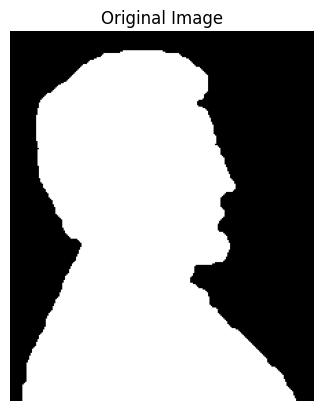

In [8]:

# Read grayscale
edge_detection_image = cv2.imread('licoln.tif', cv2.IMREAD_GRAYSCALE)

# Show it
plt.imshow(edge_detection_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [17]:
def convolve(image, kernel):
    H, W = image.shape
    kH, kW = kernel.shape

    # Compute padding sizes
    pad_h = kH // 2
    pad_w = kW // 2

    # Pad the image according to kernel size
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    # Output image
    output = np.zeros_like(image, dtype=float)

    # Perform convolution
    for i in range(H):
        for j in range(W):
            region = padded[i:i + kH, j:j + kW]
            output[i, j] = np.sum(region * kernel)

    return output


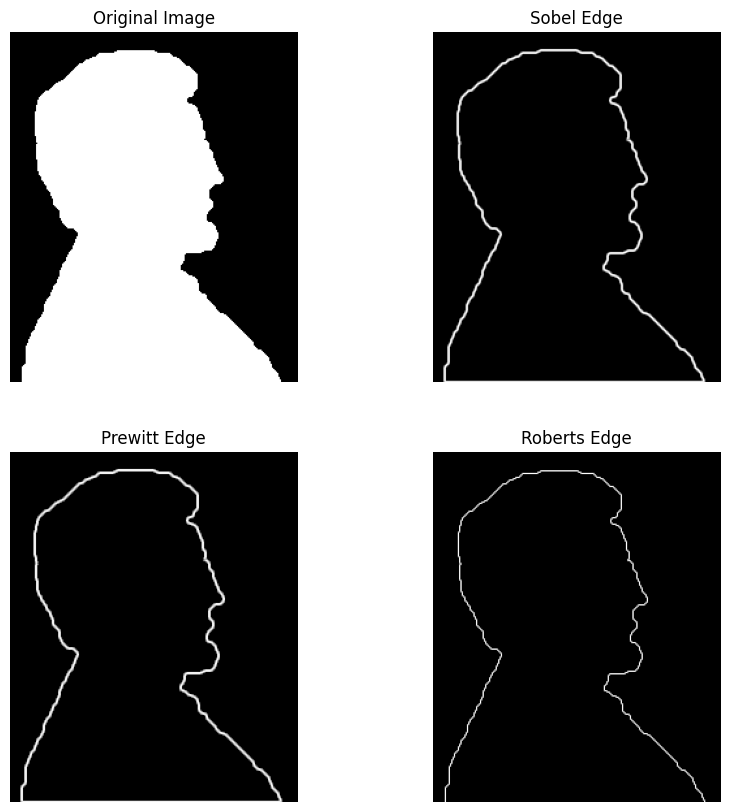

In [18]:
# import numpy as np
# from scipy import ndimage

# Sobel kernels
sobel_kernelx = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

sobel_kernely = np.array([
    [1,  2,  1],
    [0,  0,  0],
    [-1, -2, -1]
])

# sobel_kernelx = ndimage.convolve(edge_detection_image, sobel_kernelx)
# sobel_kernely = ndimage.convolve(edge_detection_image, sobel_kernely)
sobel_x = convolve(edge_detection_image, sobel_kernelx)
sobel_y = convolve(edge_detection_image, sobel_kernely)
sobel_edge = np.sqrt(sobel_x**2 + sobel_y**2)

# Prewitt
prewitt_kernelx = np.array(
    [
        [1,0,-1],
        [1,0,-1],
        [1,0,-1]
    ])

prewitt_kernely = np.array(
    [
        [1,1,1],
        [0,0,0],
        [-1,-1,-1]
    ])

prewitt_x = convolve(edge_detection_image, prewitt_kernelx)
prewitt_y = convolve(edge_detection_image, prewitt_kernely)
prewitt_edge = np.sqrt(prewitt_x**2 + prewitt_y**2)

# Roberts
roberts_cross_v = np.array(
    [
        [1, 0],
        [0, -1]
    ])

roberts_cross_h = np.array(
    [
        [0, 1], 
        [-1, 0]
    ])

roberts_x = convolve(edge_detection_image, roberts_cross_v)
roberts_y = convolve(edge_detection_image, roberts_cross_h)
roberts_edge = np.sqrt(roberts_x**2 + roberts_y**2)

# Plot all
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0,0].imshow(edge_detection_image, cmap='gray')
axs[0,0].set_title('Original Image')
axs[0,1].imshow(sobel_edge, cmap='gray')
axs[0,1].set_title('Sobel Edge')
axs[1,0].imshow(prewitt_edge, cmap='gray')
axs[1,0].set_title('Prewitt Edge')
axs[1,1].imshow(roberts_edge, cmap='gray')
axs[1,1].set_title('Roberts Edge')

for ax in axs.flat:
    ax.axis('off')
plt.show()



# ------------(b)------------

In [ ]:
# Read grayscale
simple_threshold_image = cv2.imread('./wood_dowels.tif', cv2.IMREAD_GRAYSCALE)

# Show it
plt.imshow(simple_threshold_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [ ]:
def simple_threshold(image, thresh_value, max_value):
    """
    Hardcoded simple binary thresholding:
    - Pixels > thresh_value -> max_value
    - Pixels <= thresh_value -> 0
    """
    result = np.zeros_like(image)  # Create empty output array
    
    # Apply threshold manually
    result[image > thresh_value] = max_value
    result[image <= thresh_value] = 0
    
    return result

In [ ]:
# Simple thresholding (gray level segmentation)
thresh1 = simple_threshold(simple_threshold_image, 127, 255)
thresh2 = simple_threshold(simple_threshold_image, 80, 255)
thresh3 = simple_threshold(simple_threshold_image, 180, 255)

# Show
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(thresh1, cmap='gray')
axs[0].set_title('Threshold 127')
axs[1].imshow(thresh2, cmap='gray')
axs[1].set_title('Threshold 80')
axs[2].imshow(thresh3, cmap='gray')
axs[2].set_title('Threshold 180')
for ax in axs:
    ax.axis('off')
plt.show()


# -------------(c)------------

In [ ]:
# Read grayscale
global_thresholding_image = cv2.imread('./noisy_fingerprint.tif', cv2.IMREAD_GRAYSCALE)

# Show it
plt.imshow(global_thresholding_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [ ]:
# # Basic Global Thresholding

# Step 1: Initial threshold (mean of imaage)
T = np.mean(global_thresholding_image)

# Set small value for stopping condition
epsilon = 0.5

while True:
    # Step 2: Separate into two groups
    G1 = global_thresholding_image[global_thresholding_image > T]
    G2 = global_thresholding_image[global_thresholding_image <= T]
    
    # Step 3: Compute means of two groups
    if len(G1) == 0:  # Avoid division by zero
        mean1 = 0
    else:
        mean1 = np.mean(G1)
    
    if len(G2) == 0:
        mean2 = 0
    else:
        mean2 = np.mean(G2)
    
    # Step 4: Calculate new threshold
    T_new = (mean1 + mean2) / 2
    
    # Step 5: Check for convergence
    if abs(T - T_new) < epsilon:
        break
    
    T = T_new  # Update threshold

# Final thresholding
binary_global_thresholding_image = np.zeros_like(global_thresholding_image)
binary_global_thresholding_image[global_thresholding_image > T_new] = 255
binary_global_thresholding_image[global_thresholding_image <= T_new] = 0

# Display result
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(global_thresholding_image, cmap='gray')
plt.title('Original global_thresholding_image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(binary_global_thresholding_image, cmap='gray')
plt.title(f'Global Thresholded global_thresholding_image (T={T_new:.2f})')
plt.axis('off')

plt.show()


# -------------(d)---------------

In [ ]:
# Read grayscale
septagon = cv2.imread('./septagon_noisy_shaded.tif', cv2.IMREAD_GRAYSCALE)

# Show it
plt.imshow(septagon, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [ ]:
def adaptive_threshold_mean(image, max_value, block_size, C):
    """
    Hardcoded version of Adaptive Mean Thresholding:
    - For each pixel, compute mean of block_size x block_size neighborhood
    - Threshold pixel: if pixel > mean - C, set to max_value; else 0
    """
    # Ensure block_size is odd and >= 3
    if block_size % 2 == 0 or block_size < 3:
        raise ValueError("block_size must be odd and >= 3")
    
    # Padding the image so that neighborhood operation is valid for borders
    pad = block_size // 2
    padded_image = cv2.copyMakeBorder(image, pad, pad, pad, pad, borderType=cv2.BORDER_REFLECT)
    
    output = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract local block
            block = padded_image[i:i+block_size, j:j+block_size]
            
            # Calculate mean of the block
            local_mean = np.mean(block)
            
            # Apply threshold
            if image[i, j] > (local_mean - C):
                output[i, j] = max_value
            else:
                output[i, j] = 0
    
    return output

In [ ]:
# Adaptive Thresholding
# adaptive_thresh_mean = cv2.adaptiveThreshold(
#     septagon, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
#     cv2.THRESH_BINARY, 5, 10 
# )

adaptive_thresh_mean = adaptive_threshold_mean(
    septagon, 255, block_size=5, C=10
)

adaptive_thresh_gaussian = cv2.adaptiveThreshold(
    septagon, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 5, 7 
)

# Show
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].imshow(adaptive_thresh_mean, cmap='gray')
axs[0].set_title('Adaptive Mean Thresholding')
axs[1].imshow(adaptive_thresh_gaussian, cmap='gray')
axs[1].set_title('Adaptive Gaussian Thresholding')
for ax in axs:
    ax.axis('off')
plt.show()


In [ ]:
# simple_copy_make_border_equal
import numpy as np

def simple_copy_make_border_equal(image, pad):
    """
    Simpler version when top = bottom = left = right = pad (reflect padding).
    """
    height, width = image.shape
    
    # New image size
    new_height = height + 2 * pad
    new_width = width + 2 * pad
    
    # Create empty padded image
    padded_image = np.zeros((new_height, new_width), dtype=image.dtype)
    
    # Put original image in center
    padded_image[pad:pad+height, pad:pad+width] = image
    
    # Reflect padding
    # Top
    padded_image[0:pad, pad:pad+width] = np.flipud(image[0:pad, :])
    
    # Bottom
    padded_image[pad+height:, pad:pad+width] = np.flipud(image[-pad:, :])
    
    # Left
    padded_image[:, 0:pad] = np.fliplr(padded_image[:, pad:pad+1])
    
    # Right
    padded_image[:, pad+width:] = np.fliplr(padded_image[:, pad+width-1:pad+width])
    
    return padded_image
